### ENTRENAR MODELO DE REGRESIÓN LOGÍSTICA MULTINOMINAL
-   Crear un modelo de regresión logística multinomial, que permita clasificar animales con datos sintéticos.
-   Etiquetas: 0 para mamífero, 1 para ave y 2 para reptil.
-   Las características plumas, patas y temperatura corporal

In [ ]:
# Cargamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib as plt

              precision    recall  f1-score   support

    Mamífero       1.00      1.00      1.00        29
         Ave       1.00      1.00      1.00        48
      Reptil       1.00      1.00      1.00        13

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


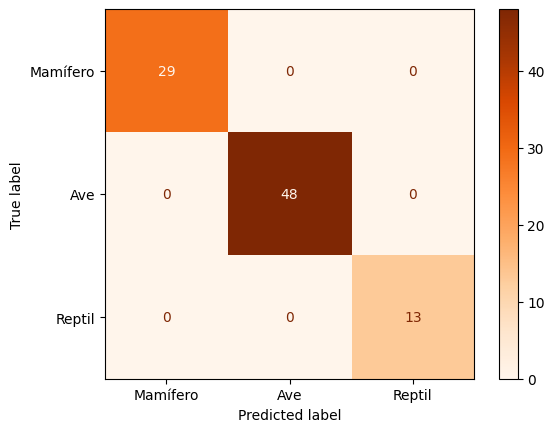

In [17]:
# Generar datos sintéticos para clasificación de especies de animales
# Etiquetas: 0 Mamíferos, 1 Aves, 2 Reptiles
# Características: 0 Pelo, 1 Plumas, 2 Escamas

np.random.seed(42)
n_samples = 300

# Características de los animales
temperatura = np.random.choice([35, 37, 40], n_samples)
num_patas = np.random.choice([0, 2, 4], n_samples)
plumas = np.random.choice([0, 1], n_samples)

# Etiquetas de los animales
y = np.where(plumas == 1, 1, np.where(temperatura >= 37, 0, 2)) # Si tiene plumas es un Ave, si no tiene plumas pero su temperatura es igual o superior a 37 es un mamífero si no; es un reptil.

# Creamos el DataFrame con los datos sintéticos generados
df = pd.DataFrame({
    'temperatura' : temperatura,
    'num_patas' : num_patas,
    'plumas' : plumas,
    'Clase' : y
})

# Definimos las variables predictoras y la variable objetivo
X = df.drop(columns=["Clase"])
y = df["Clase"]

# Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el modelo de regresión logística multinominal
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500) # El parámetro " multi_class='mulnominal' " es el que determina que este modelo de RL sea multinominal

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de la clasificación
print(classification_report(y_test, y_pred, target_names=["Mamífero", "Ave", "Reptil"]))

# Creamos la matriz de confusión y la mostramos
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Mamífero", "Ave", "Reptil"], cmap= plt.colormaps.get_cmap("Oranges"))

In [27]:
# Función para predecir la clase de un animal
def predecir_animal():
    # Solicita al usuario los datos del animal a predecir
    print("Introduce los datos del nuevo animal para predecir su clase: ")
    temperatura = float(input("Temperatura del animal (35, 37, 40): "))
    num_patas = float(input("Temperatura del animal (0, 2, 4): "))
    plumas = float(input("Temperatura del animal (0 o 1): "))

    # Crear un array de numpy con los nuevos datos
    X_new = np.array([[temperatura, num_patas, plumas]])
    X_new_scaled = scaler.transform(X_new)

    # Realizamos la prediccion
    y_new = model.predict(X_new_scaled)
    probabilidad = model.predict_proba(X_new_scaled)[0][y_new] * 100

    # Mostrar resultado
    if y_new == 0:
        resultado = "Mamífero"
    elif y_new == 1:
        resultado = "Ave"
    else:
        resultado = "Reptil"
    
    print(f"El animal es un {resultado}")
    print(f"Probabilidad de acierto: {probabilidad[0]:.2f} %")

# Llamamos a la función
predecir_animal()

Introduce los datos del nuevo animal para predecir su clase: 
El animal es un Ave
Probabilidad de acierto: 97.84 %


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
